# Graded Challenge 2

- Nama  : Pramudya Adi Nugraha
- Batch : 10

## Description

### Objective

- Mampu memuat data gambar
- Mampu melakukan transformasi tipe data gambar ke data yang siap olah
- Mampu melakukan eksplorasi data gambar
- Mampu menerapkan konsep kalkulus pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu menerapkan konsep linear algebra pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu memvisualisasikan gambar menggunakan matplotlib

### Problem Statement

Dari sebuah gambar, gunakan konsep gradien untuk mendeteksi edge pada gambar dan lakukan operasi perkalian matriks pada gambar.


## Working Area

### Import Pustaka

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

In [2]:
!wget https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


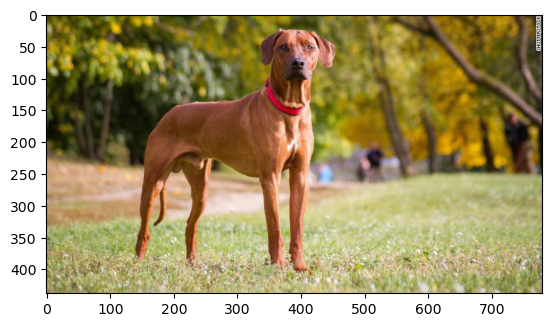

In [3]:
gambar = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
plt.imshow(gambar)

In [4]:
gambar

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [5]:
gambar.shape

(438, 780, 3)

### Data Cleaning

#### Mengubah tensor menjadi vektor

In [6]:
red = gambar[:, :, 0]
green = gambar[:, :, 1]
blue = gambar[:, :, 2]

print('Shape red : ', red.shape)
print('Shape green : ', green.shape)
print('Shape blue : ', blue.shape)

Shape red :  (438, 780)
Shape green :  (438, 780)
Shape blue :  (438, 780)


#### Mengubah gambar asli menjadi grayscale

In [7]:
grey = 0.299*red + 0.587*green + 0.114*blue

Text(0.5, 1.0, 'grayscale dengan cmap')

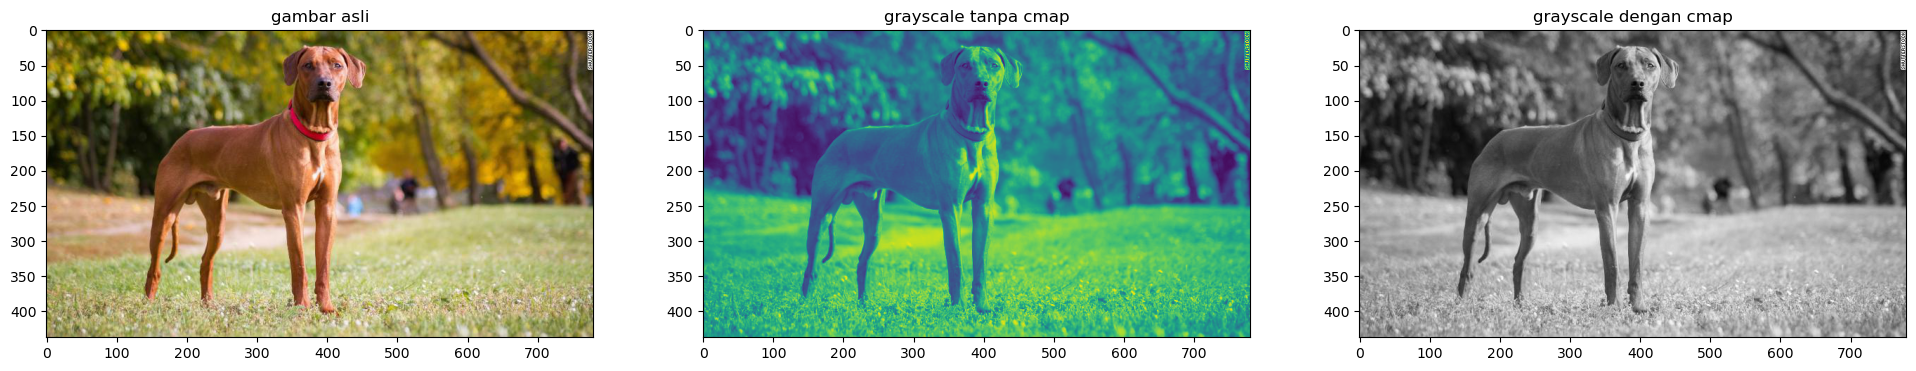

In [8]:
fig, ax = plt.subplots(ncols=3,figsize=(24,20))
ax[0].imshow(gambar)
ax[0].set_title('gambar asli')
ax[1].imshow(grey)
ax[1].set_title('grayscale tanpa cmap')
ax[2].imshow(grey, cmap='gray')
ax[2].set_title('grayscale dengan cmap')

### Image Processing

#### Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus dI/dx dan dI/dy

In [9]:
grey = 0.299*red + 0.587*green + 0.114*blue

dx , dy = np.gradient(grey)

In [10]:
dx

array([[ -9.    ,  -9.598 ,  -7.712 , ...,  -2.    ,  18.114 , -22.    ],
       [-10.242 , -10.299 ,  -8.742 , ...,   3.8205,  -0.943 ,   4.5625],
       [ -8.742 ,  -9.    ,  -7.886 , ..., 107.2385, -13.886 ,  20.1765],
       ...,
       [ -0.7365,  -2.242 ,  -2.6795, ...,   1.9915,   1.3775,   0.8775],
       [ -0.6225,  -0.886 ,  -1.685 , ...,   4.9915,   3.9915,   2.4915],
       [  0.228 ,   0.228 ,  -1.011 , ...,   5.228 ,   4.456 ,   2.456 ]])

In [11]:
dy

array([[  0.598 ,  -1.073 ,  -2.63  , ...,  -1.6055,   5.329 ,  13.    ],
       [  0.    ,  -0.429 ,  -0.831 , ...,   5.8375,  -4.671 , -27.114 ],
       [  0.484 ,   0.427 ,   0.6635, ...,  -3.1625,   6.071 ,  24.011 ],
       ...,
       [ -6.473 ,  -7.9375,  -9.3805, ...,   1.2365,  -2.5   ,  -4.    ],
       [ -7.    ,  -8.3805,  -8.3805, ...,   0.386 ,  -3.614 ,  -5.    ],
       [ -7.    ,  -9.    ,  -8.8805, ...,  -0.3205,  -5.    ,  -7.    ]])

In [12]:
grey

array([[ 84.751,  85.349,  82.605, ...,  40.129,  37.787,  50.787],
       [ 75.751,  75.751,  74.893, ...,  38.129,  55.901,  28.787],
       [ 64.267,  64.751,  65.121, ...,  47.77 ,  35.901,  59.912],
       ...,
       [150.056, 143.583, 134.181, ..., 136.133, 135.133, 131.133],
       [148.583, 141.583, 131.822, ..., 140.888, 138.66 , 133.66 ],
       [148.811, 141.811, 130.811, ..., 146.116, 143.116, 136.116]])

#### Hitung gradient magnitude tiap pixel

In [13]:
grad_magnitude = np.sqrt((dx**2) + (dy**2))

In [14]:
grad_magnitude

array([[  9.01984501,   9.65779131,   8.14811905, ...,   2.56468911,
         18.88161108,  25.55386468],
       [ 10.242     ,  10.30793102,   8.78140792, ...,   6.97657699,
          4.76523766,  27.49518871],
       [  8.75538806,   9.0101237 ,   7.91386304, ..., 107.28512147,
         15.15513236,  31.36270513],
       ...,
       [  6.51476487,   8.24805857,   9.75569067, ...,   2.34414259,
          2.85438369,   4.09511981],
       [  7.02762451,   8.42720453,   8.5482165 , ...,   5.00640273,
          5.38452117,   5.5863738 ],
       [  7.00371216,   9.00288754,   8.93786335, ...,   5.23781484,
          6.69745743,   7.4183513 ]])

Text(0.5, 1.0, 'gambar gradient magnitude')

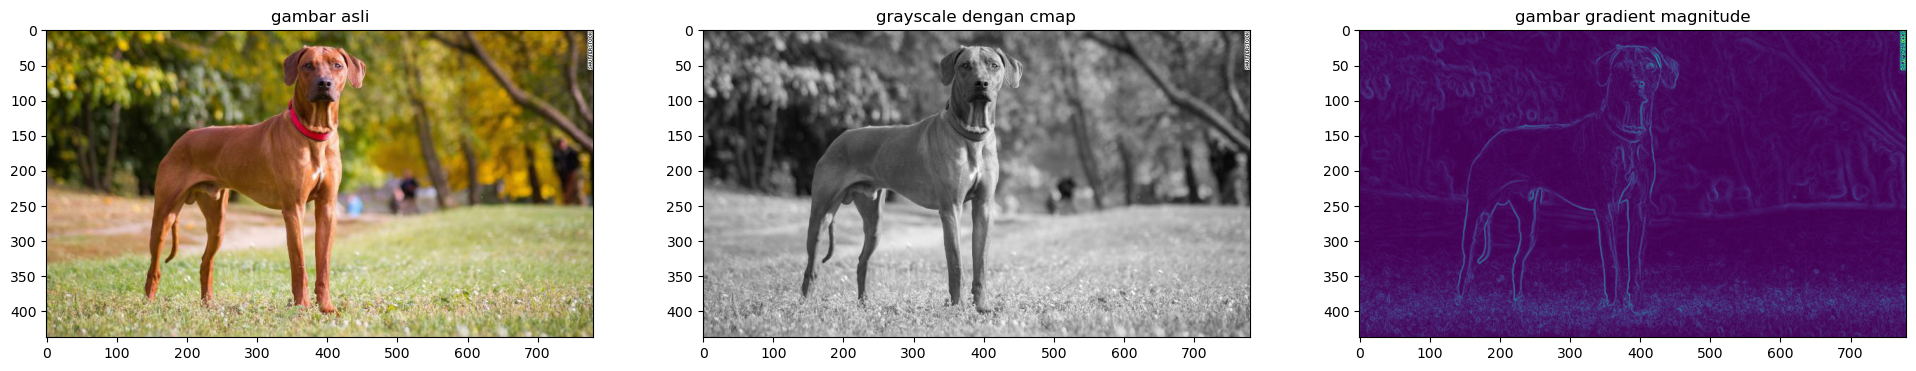

In [15]:
fig, ax = plt.subplots(ncols=3,figsize=(24,20))
ax[0].imshow(gambar)
ax[0].set_title('gambar asli')
ax[1].imshow(grey, cmap = 'gray')
ax[1].set_title('grayscale dengan cmap')
ax[2].imshow(grad_magnitude)
ax[2].set_title('gambar gradient magnitude')

#### Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi(Biasanya threshold ~ 30)

In [16]:
edge1 = np.where(grad_magnitude >= 30, grey, 0)
edge1

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 47.77 ,  0.   , 59.912],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

Text(0.5, 1.0, 'edge pada gambar dengan treshold >= 30 dengan cmap')

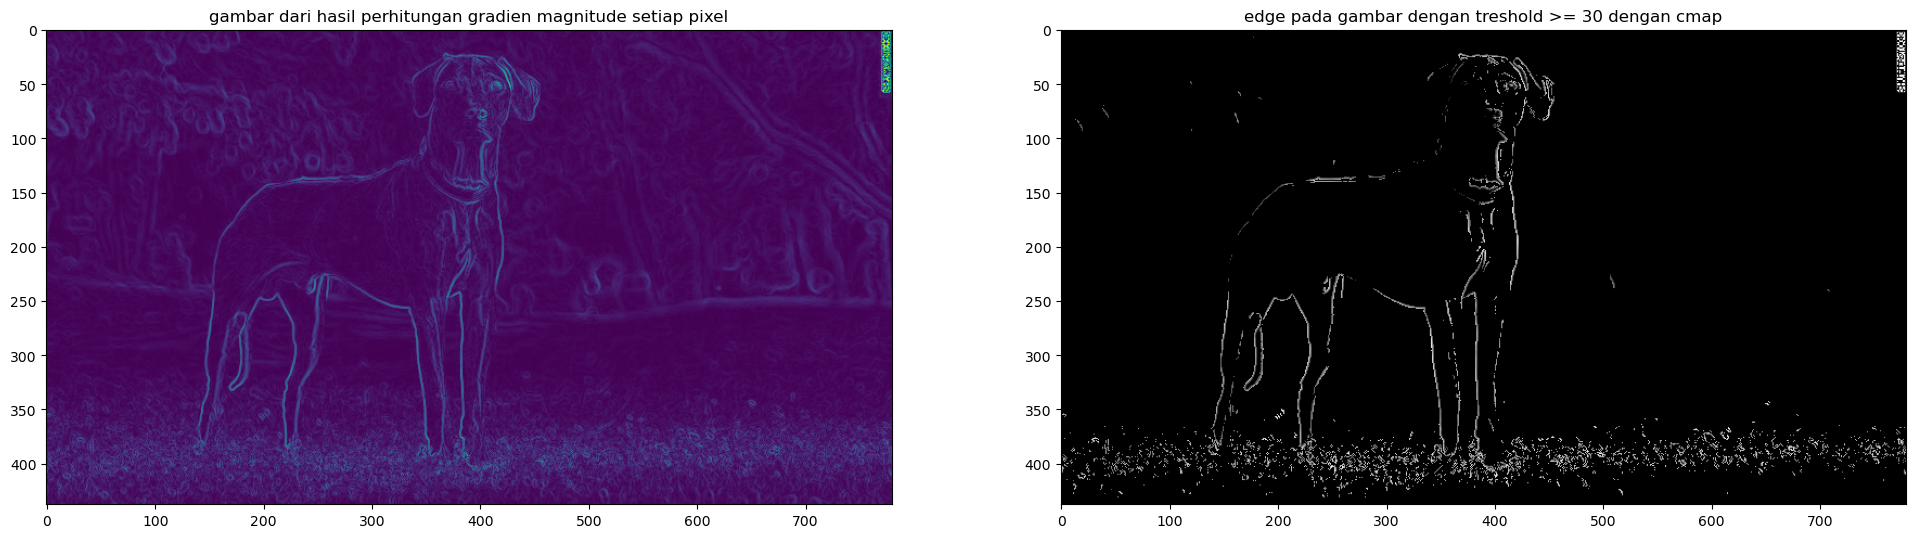

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(grad_magnitude)
ax[0].set_title('gambar dari hasil perhitungan gradien magnitude setiap pixel')
ax[1].imshow(edge1, cmap = 'gray')
ax[1].set_title('edge pada gambar dengan treshold >= 30 dengan cmap')

In [18]:
edge2 = np.where(grad_magnitude >= 10, True, 0)
edge2

array([[0, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, 'edge pada gambar dengan treshold >= 10 dengan cmap')

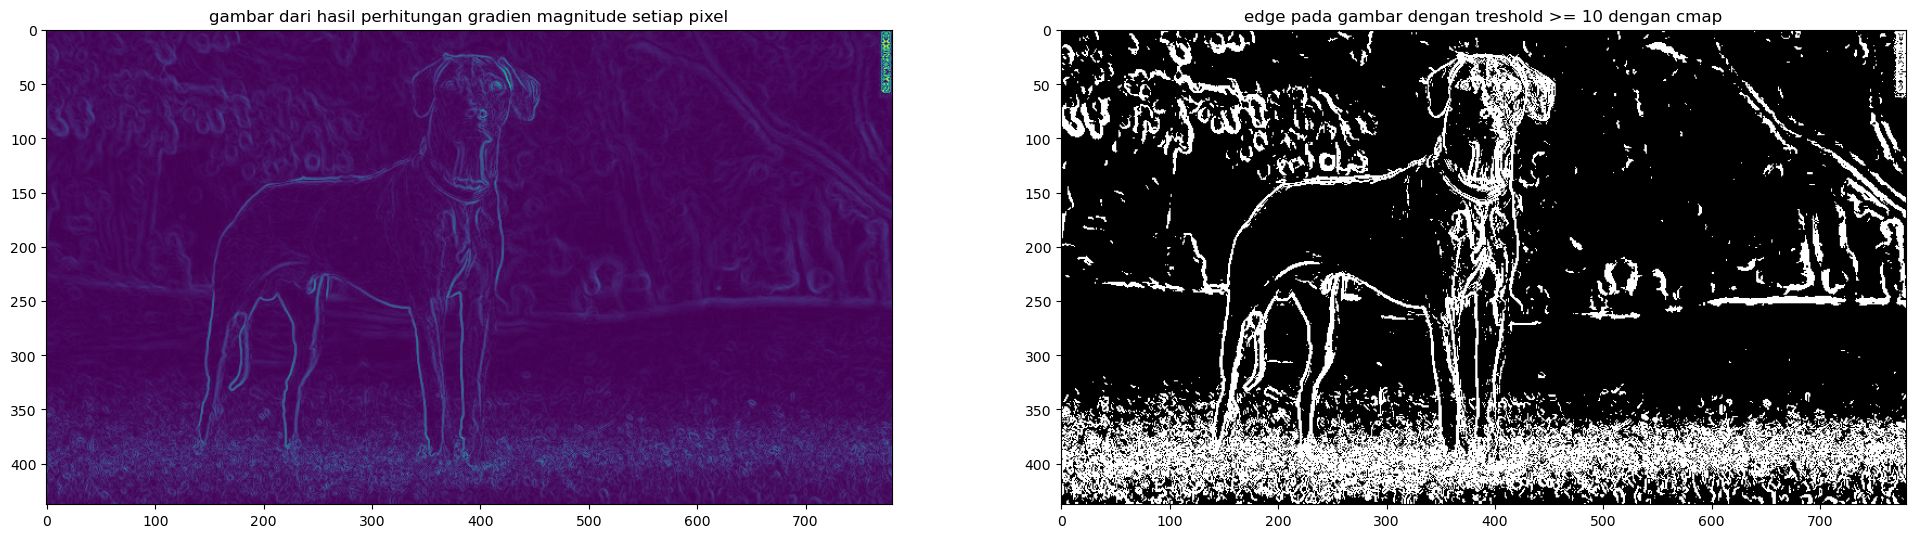

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(grad_magnitude)
ax[0].set_title('gambar dari hasil perhitungan gradien magnitude setiap pixel')
ax[1].imshow(edge2, cmap = 'gray')
ax[1].set_title('edge pada gambar dengan treshold >= 10 dengan cmap')

In [20]:
edge3 = np.where(grad_magnitude >= 50, True, 0)
edge3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, 'edge pada gambar dengan treshold >= 50 dengan cmap')

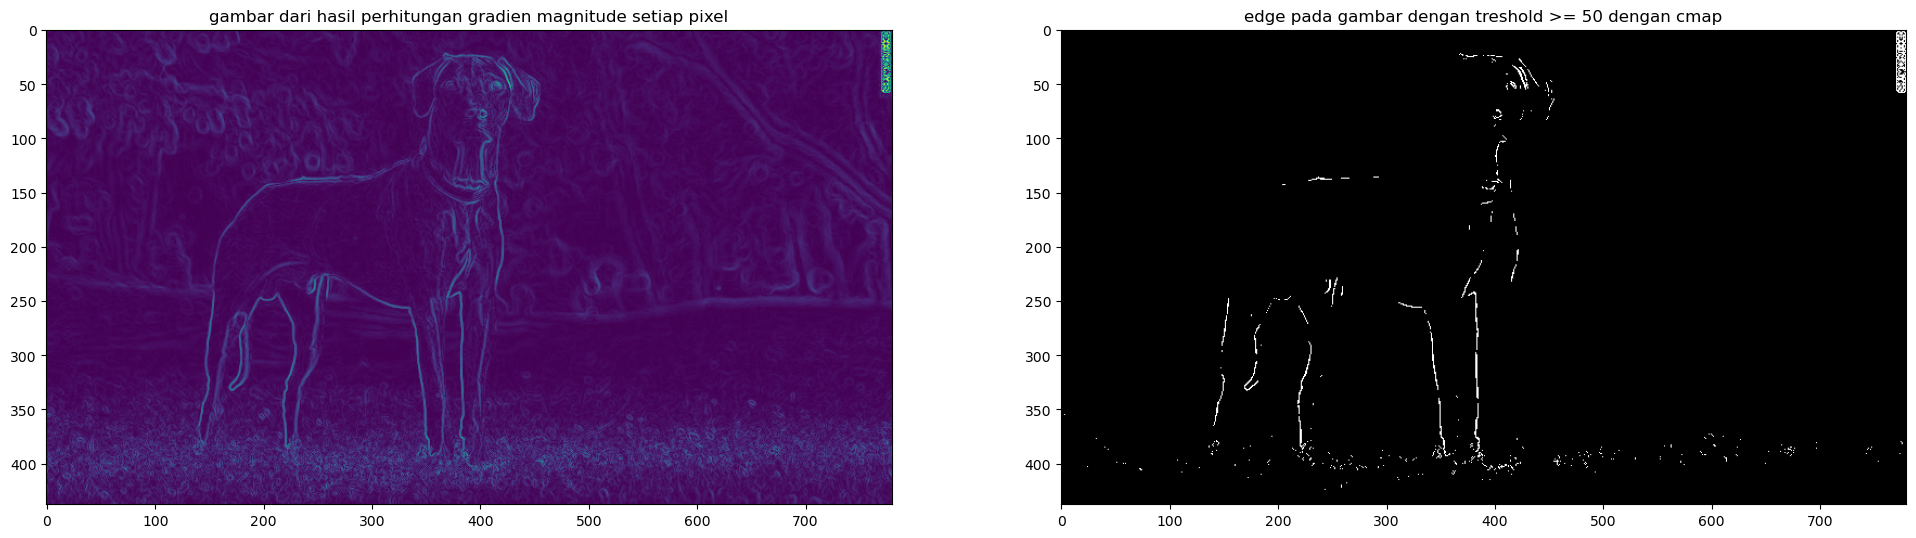

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(grad_magnitude)
ax[0].set_title('gambar dari hasil perhitungan gradien magnitude setiap pixel')
ax[1].imshow(edge3, cmap = 'gray')
ax[1].set_title('edge pada gambar dengan treshold >= 50 dengan cmap')

#### Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.

In [22]:
edge1

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 47.77 ,  0.   , 59.912],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [23]:
new_matrix = edge1 @ np.eye(780)
new_matrix

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., 47.77 ,  0.   , 59.912],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

Text(0.5, 1.0, 'gambar hasil perkalian dengan matrix identitas')

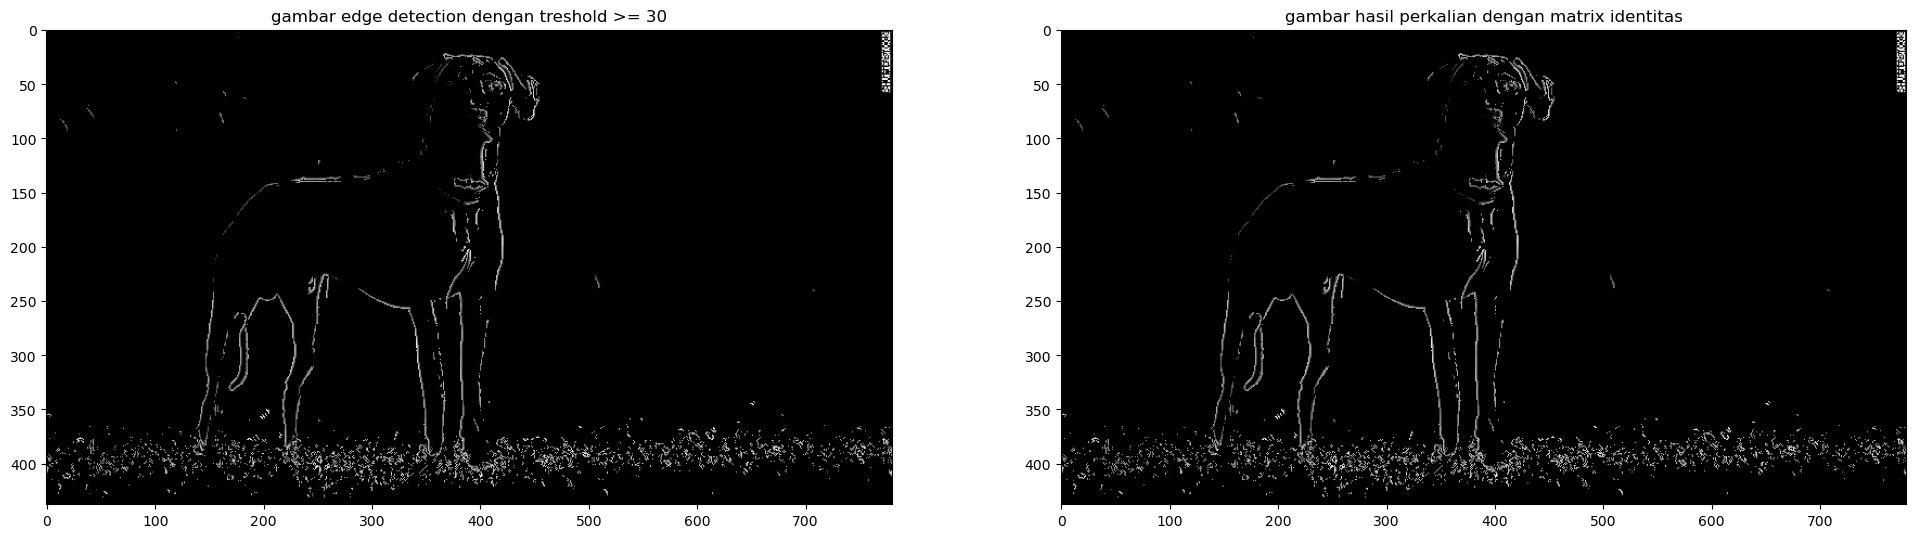

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(edge1, cmap = 'gray')
ax[0].set_title('gambar edge detection dengan treshold >= 30')
ax[1].imshow(new_matrix, cmap = 'gray')
ax[1].set_title('gambar hasil perkalian dengan matrix identitas')

## Conclusions, Assumptions, Overall Analysis

- gambar yang diimport merupakan sebuah tensor yang memiliki baris, kolom, dan channel. Jumlah channel pada gambar tersebut adalah 3
- Tensor yang didapatkan kemudian diubah menjadi bentuk matrix dan grayscale dengan menggunakan persamaan grey = 0.299*red + 0.587*green + 0.114*blue
- Dari hasil transformasi tersebut dilakukan penurunan terhadapa variabel x dan y dari matrix grey, yang menghasilkan gambar sebagai berikut:

Text(0.5, 1.0, 'dy')

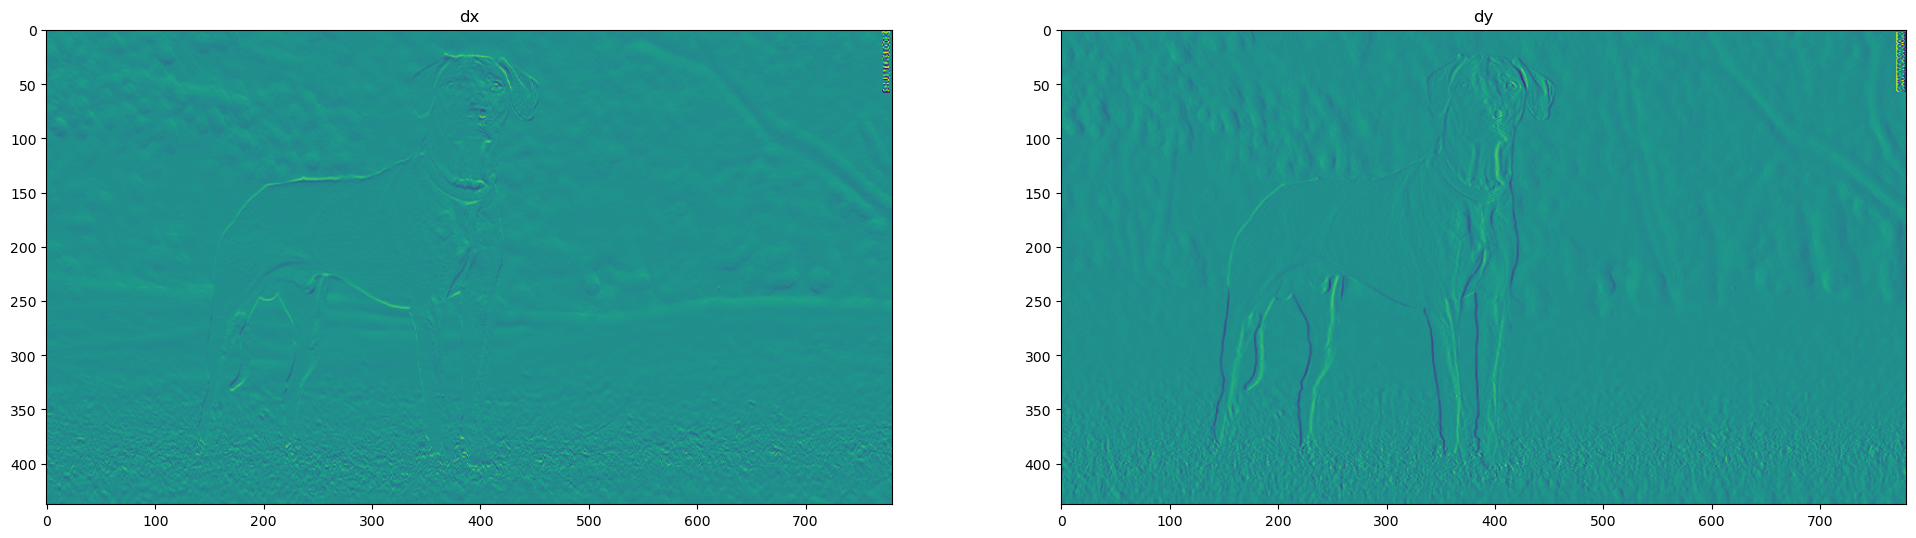

In [25]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(dx)
ax[0].set_title('dx')
ax[1].imshow(dy)
ax[1].set_title('dy')

- Pada saat hasil penghitungan gradien magnitude setiap pixel diberikan beberapa treshold yaitu 10, 30, dan 50 didapatkan hasil sebagai berikut:

Text(0.5, 1.0, 'gambar edge dengan treshold 50')

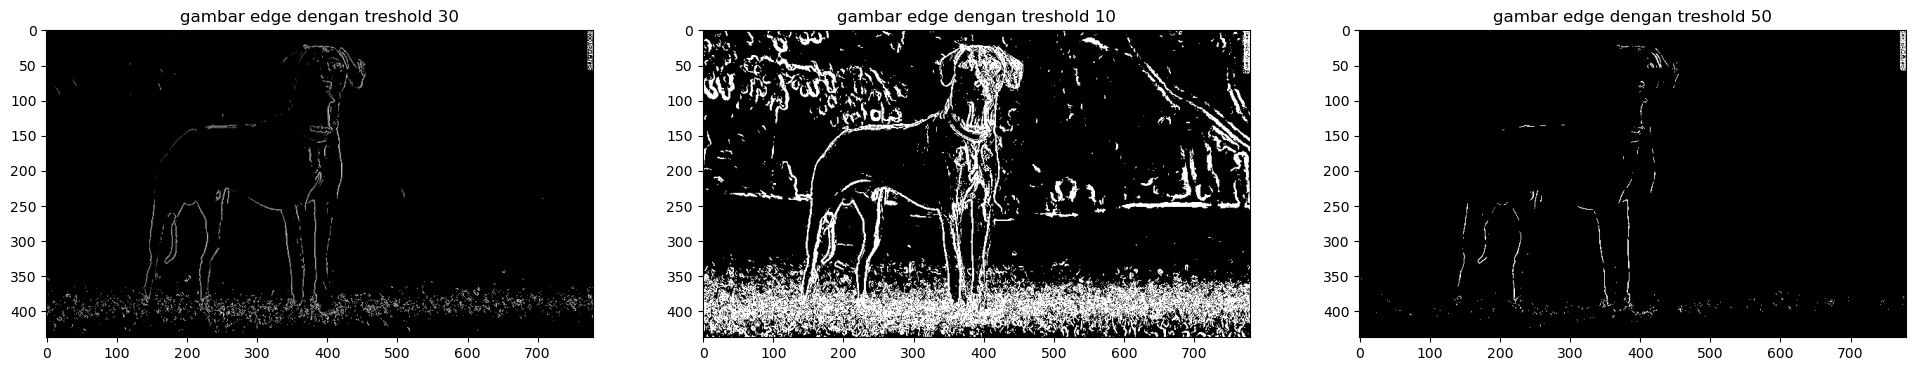

In [26]:
fig, ax = plt.subplots(ncols=3,figsize=(24,20))
ax[0].imshow(edge1, cmap = 'gray')
ax[0].set_title('gambar edge dengan treshold 30')
ax[1].imshow(edge2, cmap = 'gray')
ax[1].set_title('gambar edge dengan treshold 10')
ax[2].imshow(edge3, cmap = 'gray')
ax[2].set_title('gambar edge dengan treshold 50')

- Dari hasil visualisasi di atas dapat dilihat bahwa pada treshold 30 didapatkan visualisasi yang hampir maksimalkan hasilnya
- Jika treshold yang diberikan terlalu besar akan berpengaruh dengan hasil visualisasi di mana edge yang ingin kita dapatkan tidak dapat tervisualisasi dengan baik.
- jika treshold yang diberikan terlalu kecil, maka noise yang timbul dari hasil visualisasi akan semakin banyak

Text(0.5, 1.0, 'gambar hasil perkalian dengan matrix identitas')

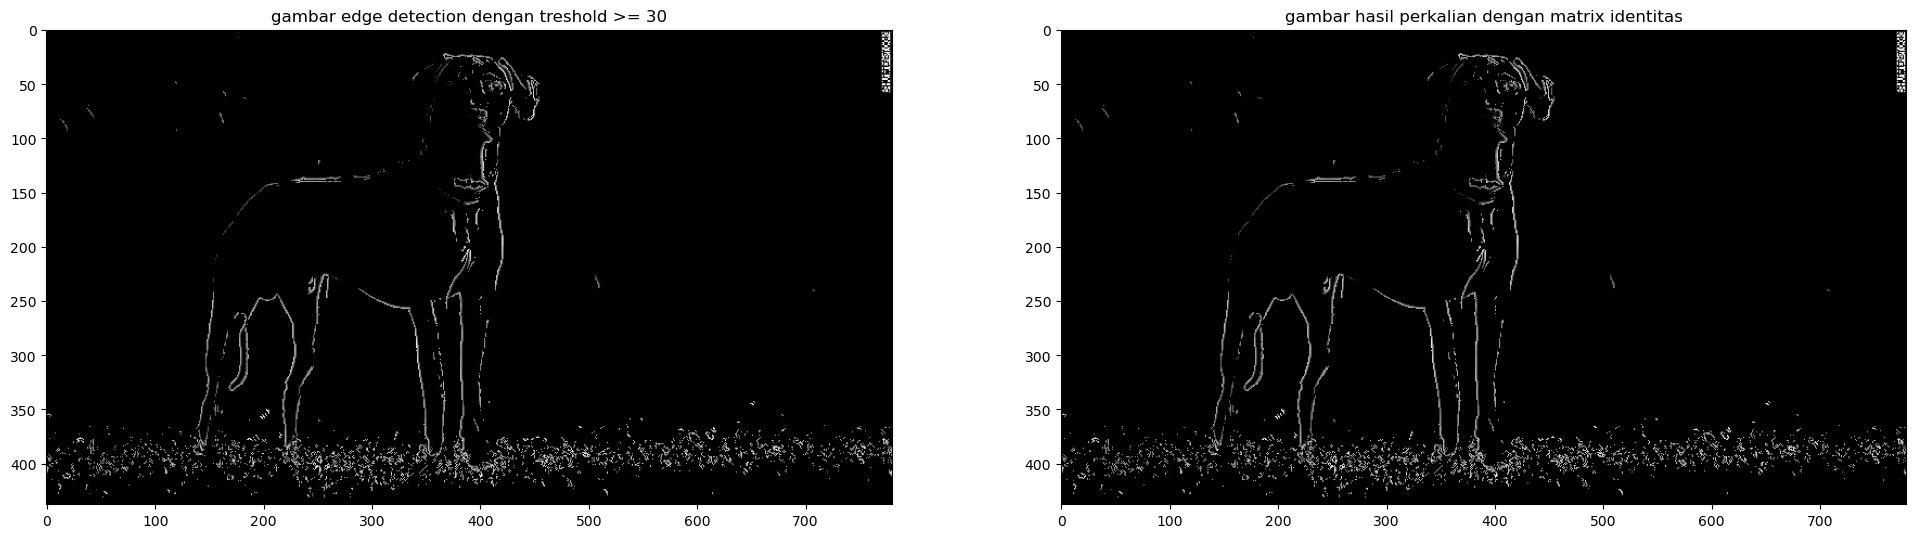

In [27]:
fig, ax = plt.subplots(ncols=2,figsize=(24,20))
ax[0].imshow(edge1, cmap = 'gray')
ax[0].set_title('gambar edge detection dengan treshold >= 30')
ax[1].imshow(new_matrix, cmap = 'gray')
ax[1].set_title('gambar hasil perkalian dengan matrix identitas')

- Gambar di atas merupakan perbandingan antara gambar asli dari matrix edge detection dengan treshold >= 30 dan gambar hasil dari perkalian dengan matrix identitas. Kedua gambar sama persis, karena setiap matrix yang dikalikan dengan matrix identitas tidak akan berpengaruh pada value dari matrix tersebut atau hasilnya akan menjadi matrix itu sendiri.